In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def emulateHHL(A,b,lamda0_tilde,lamda1_tilde):
        '''
        input parameters :
        A : The matrix A for which we need to calculate the eigen values and eigen vectors
        b : the vector from the system of equeation Ax = b.
        lamda0_tilde  : The value of the first Eigen value.
        lamda1_tilde : The value for the second Eigen value.

        return parameters:
        count : Dictionary where key is the quantum states |00>, |01>, |10>, |11> 
                and the values are the corresponding counts, hence giving a probablity distribution
        '''

        # Get the solution to the system of linear equations
        x1,x2 = np.linalg.solve(A,b)

        # Normalize the values so that they can be encoded as amplitudes of the quantum state we create for x as |x>
        normalized_x1 = (x1)/np.sqrt(x1**2 + x2**2)
        normalized_x2 = (x2)/np.sqrt(x1**2 + x2**2)

        # Create the Qunatum State for x
        ket_x = [normalized_x1 , normalized_x2]

        # Define the value for C 
        c = np.minimum(lamda0_tilde,lamda1_tilde)

        # Create ket zero
        ket_zero = np.array([1,0])

        # Create ket one
        ket_one = np.array([0,1])

        # Create ket 'a' which is the quantum state of the ancilla qubit for lamda0_tilde
        ket_a_lamda0_tilde = (np.sqrt(1 - (c**2/lamda0_tilde**2)))*ket_zero + (c/lamda0_tilde)*ket_one

        # Create ket 'a' which is the quantum state of the ancilla qubit for lamda1_tilde
        ket_a_lamda1_tilde = (np.sqrt(1 - (c**2/lamda1_tilde**2)))*ket_zero + (c/lamda1_tilde)*ket_one

        # Get the tensor product of x and a . This is essentially going to give us the amplitudes of |00>, |01>, |10>, |11> 
        x_a_lamda0_tensor = np.kron(ket_x,ket_a_lamda0_tilde)

        x_a_lamda1_tensor = np.kron(ket_x,ket_a_lamda1_tilde)
 
        x_a_tensor = x_a_lamda0_tensor + x_a_lamda1_tensor

        # Normalise the amplitudes
        norm_x_a_tensor = np.linalg.norm(x_a_tensor)

        x_a_tensor_amplitude = (1/norm_x_a_tensor) * x_a_tensor

        # Create a Dictionary for the measure count of the states |00>, |01>, |10>, |11>  
        measure_count = {'00': 0, '01': 0, '10': 0, '11': 0}

        for i in range(8192):
                r = np.random.rand()
                if r < x_a_tensor_amplitude[0]**2:
                        measure_count['00'] += 1
                elif r < (x_a_tensor_amplitude[0]**2 + x_a_tensor_amplitude[1]**2):
                        measure_count['01'] += 1
                elif r < (x_a_tensor_amplitude[0]**2 + x_a_tensor_amplitude[1]**2 + x_a_tensor_amplitude[2]**2):
                        measure_count['10'] += 1
                else:
                        measure_count['11'] += 1
        # Extracting keys and values from the dictionary
        x_values = list(measure_count.keys())
        y_values = list(measure_count.values())

        # Calculating probabilities
        total_counts = sum(y_values)
        probabilities = [count / total_counts for count in y_values]

        # Plotting the histogram with exact y-values on top of the bars
        fig, ax = plt.subplots()
        bars = ax.bar(x_values, probabilities, color='blue', alpha=0.7)

        # Adding exact y-values on top of the bars
        for bar, prob in zip(bars, probabilities):
                yval = bar.get_height()
                ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')


        # Plotting the histogram
        # plt.bar(x_values, probabilities, color='blue', alpha=0.7)
        plt.xlabel('X Values')
        plt.ylabel('Probability')
        plt.title('Histogram of Probabilities')
        plt.show()

        return measure_count


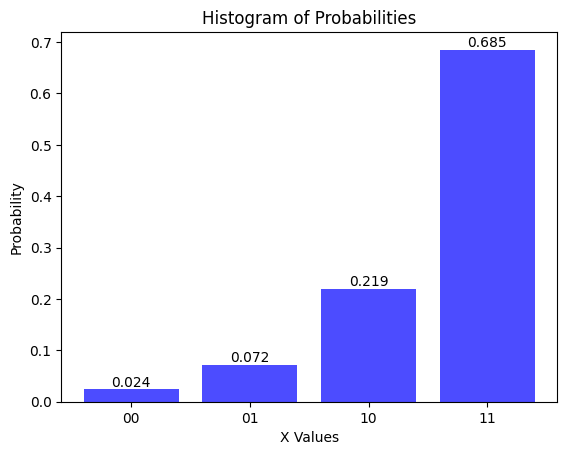

{'00': 196, '01': 586, '10': 1797, '11': 5613}


In [17]:
import numpy as np
A = [[1 , -1/3],[-1/3 , 1]]
b = [0,1]
count = emulateHHL(A,b,1,2)
print(count)
